# **OBJECTIVE :**
# **`Business Case & Hypothesis`**

1.   ##  How did the US market evolve during the decade of the 2010s ?
2.   ##  What are the market segments ?




##### So the analysis will be based on market segmentation:
##### -> Buyer's Age, Gender
##### -> Transaction period
##### -> Shopping Category

# Source : Financial Transactions Dataset (www.Kaggle.com)


#### Overview : This comprehensive financial dataset combines transaction records, customer information, and card data from a banking institution, spanning across the 2010s decade.

### Dataset Information

#### <b><u>1. Transaction Data<b><u>

##### * Detailed transaction records including amounts, timestamps, and merchant details
##### * Covers transactions throughout the 2010s
##### * Features transaction types, amounts, and merchant information
##### * Perfect for analyzing spending patterns and building fraud detection models

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | ID number of the transaction                                                                                |
| date          | Transction's date                                                                                           |
| client_id     | Client id number                                                                                            |
| card_id       | Card id number                                                                                              |
| amount        | Amount of the transaction                                                                                   |
| use_chip      | Transaction methodology                                                                                     |
| merchant_id   | ID munber of the merchant                                                                                   |
| merchant_city | City of the merchant                                                                                        |
| merchant_state| State of the merchant                                                                                       |
| zip           | Zip code of the merchant                                                                                    |
| mcc           | ID number indicating the category goods or services concerned by the transation                             |
| errors        | Transaction Error                                                                                           |




#### <b><u>2. User Data<b><u>

##### * Demographic information about customers
##### * Account-related details
##### * Enables customer segmentation and personalized analysis

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | ID number of the user                                                                                       |                         
| current_age   | Age of the User                                                                                             |
| retirement_age| Age of retirement (done or planned)                                                                         |
| birth_year    | Year of birth                                                                                               |
| birth_month   | Month of bitrh                                                                                              |
| Gender        | Gendrer                                                                                                     |
| Adress        | Adress                                                                                                      |
| Latitude      | Latitude of the Adress                                                                                      |
| Longitude     | Longitude of the Adress                                                                                     |
| per_capita_income| Income per number of people                                                                              |
| yearly_income | Yearly Income of the User                                                                                   |
| total_debt    | TOTAL amount of debt                                                                                        |
| credit_score  | Credit Score                                                                                                |
| num_credit_cards    | Number of credit cards                                                                                |


#### <b><u>3. Merchant Category Codes<b><u>

##### * Standard classification codes for business types
##### * Enables transaction categorization and spending analysis
##### * Industry-standard MCC codes with descriptions

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | ID number of the category                                                                                   |                         
| description   | Categorie description                                                                                       |


## <span style="color:blue;">1. FIRST STEP : DATA WRANGLING

### **Comments :**
### **In this initial step, I will prepare data for analysis.**
1. Data Extraction - I will connect to the database and extract data.
2. Data Cleaning - Once the extraction is done, I will clean tables ( e .g., delete unused columns - modify data to the proper format).
3. Data Aggregation - Once the tables are cleaned, I will consolidate them . I chose to consolidate the data because the volume is huge and analysis cannot be performed using the " standard " way with SQL.

### <b><span style="color:green;">✓</span> <u>ETL - Extraction Transform Load</u></b>

In [ ]:
import kagglehub

# Download the latest version
path = kagglehub.dataset_download("computingvictor/transactions-fraud-datasets")

print("Path to dataset files:", {path})

Using Colab cache for faster access to the 'transactions-fraud-datasets' dataset.
Path to dataset files: {'/kaggle/input/transactions-fraud-datasets'}


In [ ]:
# List of files in the connected folder from Kaggle
!ls {path}

cards_data.csv	train_fraud_labels.json  users_data.csv
mcc_codes.json	transactions_data.csv


### **Comments :**
For this exercise I will need the 3 files listed above. The train_fraud_labels file will not be used.

In [ ]:
# Impport libraries

import pandas as pd
import os
import json

In [ ]:
transaction_data = f'{path}/transactions_data.csv'
users_data = f'{path}/users_data.csv'
mcc_codes_data = f'{path}/mcc_codes.json'

In [ ]:
# Transaction data to pandas as td
td = pd.read_csv(transaction_data, header=0)

# Users data to pandas as ud
ud = pd.read_csv(users_data, header=0)

# MCC codes datas to pandas
with open(mcc_codes_data, 'r') as f:
    data = json.load(f)
mcc = pd.DataFrame.from_dict(data, orient='index', columns=['description'])
mcc = mcc.reset_index()
mcc.rename(columns={'index': 'mcc_code'}, inplace=True)

print(f"Data Loaded:")
print(f"- td: {td.shape}")
print(f"- ud: {ud.shape}")
print(f"- mcc: {mcc.shape}")

Data Loaded:
- td: (13305915, 12)
- ud: (2000, 14)
- mcc: (109, 2)


### **Comments :**

##### **Seeing the dataframe size, the libraries I will use :**
1.   td : '**transaction dataframe**' is over +13 million rows, so I will use **PySpark**
2.  ud : '**user dataframe**' has 2000 rows, I will use **pandas**
3. mcc : '**Merchant Category Codes dataframe**' 109 rows ; I will use **pandas**



### <b><span style="color:green;">✓</span> <u>Data Cleaning</u></b>

#### <u>Merchant Category Codes<u>

In [ ]:
# Quick view of the table showing the number of columns, non-null values and data types.
mcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   mcc_code     109 non-null    object
 1   description  109 non-null    object
dtypes: object(2)
memory usage: 1.8+ KB


In [ ]:
# There are no null values, and now I am verifying if there are any duplicate values
duplicate = mcc.duplicated().sum()
print(duplicate)

0


### **Comments :**
This table **contains 109 unique codes** and descriptions without null or duplicate entries. **So, this table is CLEAN**

However, confronted **with 109 distinct MCC codes needing classification** for broad analysis (**Macro-Trends**), I **chose a hybrid strategy to enhance efficiency.**

I **utilized** a large language model (**LLM**) to create an **initial draft** of semantic aggregation for the **109 codes categorized into about 20 business sectors** (for instance, combining 10 different 'Eating Places' codes into one 'Restaurants and Dining Out' category).

From this first grouping, I subsequently verified, improved, and executed it manually (using Excel) to confirm that the categories established were:
1. Pertinent to the context of the US market
2. Analytically in accordance with the project's business goals.


In [ ]:
# Creation of a mapping dictionary for the mcc code

mapping_categories = {
'5812' : 'Restaurants and Dining Out',
'5541' : 'Automotive and Transportation',
'7996' : 'Entertainment and Leisure',
'5411' : 'Groceries',
'4784' : 'Automotive and Transportation',
'4900' : 'Utilities',
'5942' : 'Media, Books and Digital Entertainment',
'5814' : 'Restaurants and Dining Out',
'4829' : 'Financial Services',
'5311' : 'Clothing and General Shopping',
'5211' : 'Home and Hardware',
'5310' : 'Clothing and General Shopping',
'3780' : 'IT and Communication Services',
'5499' : 'Groceries',
'4121' : 'Automotive and Transportation',
'5300' : 'Groceries',
'5719' : 'Home, Furniture and Decor',
'7832' : 'Entertainment and Leisure',
'5813' : 'Restaurants and Dining Out',
'4814' : 'IT and Communication Services',
'5661' : 'Clothing and General Shopping',
'5977' : 'Personal Care and Beauty',
'8099' : 'Health and Wellness',
'7538' : 'Automotive and Transportation',
'5912' : 'Health and Wellness',
'4111' : 'Automotive and Transportation',
'5815' : 'Media, Books and Digital Entertainment',
'8021' : 'Health and Wellness',
'5921' : 'Groceries',
'5655' : 'Clothing and General Shopping',
'7230' : 'Personal Care and Beauty',
'3390' : 'Industrial Materials and Services',
'7922' : 'Entertainment and Leisure',
'3722' : 'Automotive and Transportation',
'5651' : 'Clothing and General Shopping',
'4899' : 'IT and Communication Services',
'5251' : 'Home and Hardware',
'7995' : 'Entertainment and Leisure',
'3596' : 'Industrial Materials and Services',
'3730' : 'Industrial Materials and Services',
'9402' : 'Postal Services',
'7801' : 'Entertainment and Leisure',
'5970' : 'Creative Hobbies and Supplies',
'5932' : 'Home, Furniture and Decor',
'5621' : 'Clothing and General Shopping',
'7349' : 'Home Services',
'4722' : 'Travel and Transportation',
'5193' : 'Home and Hardware',
'3775' : 'Freight Transportation',
'3684' : 'Electronics and Technology',
'5045' : 'Electronics and Technology',
'3504' : 'Home and Hardware',
'7011' : 'Travel and Transportation',
'8041' : 'Health and Wellness',
'4214' : 'Freight Transportation',
'6300' : 'Financial Services',
'8011' : 'Health and Wellness',
'3509' : 'Industrial Materials and Services',
'7210' : 'Home Services',
'5192' : 'Media, Books and Digital Entertainment',
'7542' : 'Automotive and Transportation',
'3640' : 'Home and Hardware',
'7393' : 'Professional Services',
'8111' : 'Professional Services',
'3771' : 'Automotive and Transportation',
'5732' : 'Electronics and Technology',
'5094' : 'Jewelry and Luxury Goods',
'5712' : 'Home, Furniture and Decor',
'5816' : 'Media, Books and Digital Entertainment',
'7802' : 'Entertainment and Leisure',
'3389' : 'Industrial Materials and Services',
'8043' : 'Health and Wellness',
'3393' : 'Industrial Materials and Services',
'3174' : 'Home, Furniture and Decor',
'3001' : 'Industrial Materials and Services',
'3395' : 'Industrial Materials and Services',
'3058' : 'Industrial Materials and Services',
'8049' : 'Health and Wellness',
'3387' : 'Industrial Materials and Services',
'4112' : 'Automotive and Transportation',
'3405' : 'Industrial Materials and Services',
'5261' : 'Home and Hardware',
'3144' : 'Home, Furniture and Decor',
'3132' : 'Clothing and General Shopping',
'3359' : 'Industrial Materials and Services',
'8931' : 'Professional Services',
'8062' : 'Health and Wellness',
'7276' : 'Professional Services',
'4131' : 'Automotive and Transportation',
'3260' : 'Creative Hobbies and Supplies',
'3256' : 'Industrial Materials and Services',
'3006' : 'Industrial Materials and Services',
'7531' : 'Automotive and Transportation',
'1711' : 'Home Services',
'5947' : 'Clothing and General Shopping',
'3007' : 'Industrial Materials and Services',
'4511' : 'Travel and Transportation',
'3075' : 'Industrial Materials and Services',
'3066' : 'Industrial Materials and Services',
'3005' : 'Industrial Materials and Services',
'4411' : 'Travel and Transportation',
'3000' : 'Industrial Materials and Services',
'5533' : 'Automotive and Transportation',
'3008' : 'Industrial Materials and Services',
'7549' : 'Automotive and Transportation',
'5941' : 'Clothing and General Shopping',
'5722' : 'Home, Furniture and Decor',
'3009' : 'Industrial Materials and Services',
'5733' : 'Media, Books and Digital Entertainment'
}

In [ ]:
# Adding the Grouped Category to the Merchant Code Category table.
mcc['Grouped Category'] = mcc['mcc_code'].map(mapping_categories)

# Show Extract
mcc.head(5)

,mcc_code,description,Grouped Category
0,5812,Eating Places and Restaurants,Restaurants and Dining Out
1,5541,Service Stations,Automotive and Transportation
2,7996,"Amusement Parks, Carnivals, Circuses",Entertainment and Leisure
3,5411,"Grocery Stores, Supermarkets",Groceries
4,4784,Tolls and Bridge Fees,Automotive and Transportation


### **Comments :**
**The table is CLEANED and READY for the next analysis STEP**

#### <u>User<u>

In [ ]:
# Checking the user table
ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [ ]:
duplicate = ud.duplicated().sum()
print(duplicate)

0


### **Comments :**
#### The table does NOT contain null values or duplicates
#### I will drop many useless columns for the analysis :
- retirement_age
- birth_year
- birth_month
- address
- latitude
- longitude
- total_debt
- num_credit_cards

#### I will convert the columns per_capita_income and yearly_income into numbers.

In [ ]:
# Delete unused columns
ud = ud.drop(columns=['retirement_age', 'birth_year', 'birth_month', 'address', 'latitude', 'longitude', 'total_debt', 'num_credit_cards'])

# Delete '$' from the columns 'per_capita_income' and 'yearly_income' and convert into float data type
ud['per_capita_income'] = pd.to_numeric(ud['per_capita_income'].str.replace('$', '', regex=False), errors='coerce').astype('Int64')
ud['yearly_income'] = pd.to_numeric(ud['yearly_income'].str.replace('$', '', regex=False), errors='coerce').astype('Int64')

**The table is CLEANED and READY for analysis.**

#### <u>Transaction Data Table<u>

### **Comments :**
Due to the fact the table is huge and pandas will not be sufficient for the analysis. I will use **PySpark** and push all tables into a **Spark session** to prepare the aggregation and analysis in a 'final' table.

In [ ]:
# Suppress warnings generated by the code:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
warnings.filterwarnings('ignore')

# Initialization of Spark Session
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, when, isnan, isnull, approx_count_distinct

In [ ]:
# Session creation in Spark
spark = SparkSession.builder.appName("DataAnalysis").getOrCreate()

# Loading the CSV files to SPARK
ud_spark = spark.createDataFrame(ud)
mcc_spark = spark.createDataFrame(mcc)
td_spark = spark.read.csv(f'{path}/transactions_data.csv', header=True, inferSchema=True)


# For faster analysis, I am pushing data into the caching system.
ud_spark.cache()
mcc_spark.cache()
td_spark.cache()

DataFrame[id: int, date: timestamp, client_id: int, card_id: int, amount: string, use_chip: string, merchant_id: int, merchant_city: string, merchant_state: string, zip: double, mcc: int, errors: string]

In [ ]:
# Analysis of the transaction DataFrame
print("\n=== NULL VALUES ===")

# Count the TOTAL number of rows
total_rows = td_spark.count()
print(f"Total rows: {total_rows:,}")

# Analysis by column
analysis_data = []
type_dict = dict(td_spark.dtypes)

print("Analyzing null values for each column...")

for column in td_spark.columns:
    print(f"Processing column: {column}")

    column_type = type_dict[column]

    # Count the null values by type
    if column_type in ['double', 'float', 'decimal']:
        null_count = td_spark.filter(col(column).isNull() | isnan(col(column))).count()
    else:
        null_count = td_spark.filter(col(column).isNull()).count()

    # Calculate the percentage
    null_percentage = round((null_count / total_rows) * 100, 2) if total_rows > 0 else 0

    # Count unique values
    unique_count = td_spark.select(approx_count_distinct(col(column))).collect()[0][0]

    analysis_data.append({
        'Column': column,
        'Type': column_type,
        'Null Values': null_count,
        'Null %': null_percentage,
        'Unique Values': unique_count
    })

# Create a Pandas DataFrame
missing_data = pd.DataFrame(analysis_data)

# Sort by null values descending
missing_data = missing_data.sort_values('Null Values', ascending=False)
print(missing_data.to_string(index=False))

# Display the dataset
print("\n=== SAMPLE DATA ===")
td_spark.show(5, truncate=False)


=== NULL VALUES ===
Total rows: 13,305,915
Analyzing null values for each column...
Processing column: id
Processing column: date
Processing column: client_id
Processing column: card_id
Processing column: amount
Processing column: use_chip
Processing column: merchant_id
Processing column: merchant_city
Processing column: merchant_state
Processing column: zip
Processing column: mcc
Processing column: errors
        Column      Type  Null Values  Null %  Unique Values
        errors    string     13094522   98.41             21
           zip    double      1652706   12.42          23398
merchant_state    string      1563700   11.75            196
            id       int            0    0.00       13192364
       card_id       int            0    0.00           3945
     client_id       int            0    0.00           1201
          date timestamp            0    0.00        3935053
        amount    string            0    0.00          79897
 merchant_city    string            0   

#### Convert date into month and year (for data aggregation)
#### To be deleted : id - date - card_id - zip - errors

In [ ]:
from pyspark.sql.functions import to_date, month, year, regexp_replace
from pyspark.sql.types import FloatType

# Convert the date to date time and split the column into day , month , and year in order to verify the correlation data later.

# 1.Convert the date time column to the date format
td_spark = td_spark.withColumn('date', to_date('date'))

# 2.Assume that the 'date' column is now of the timestamp type
td_spark = td_spark.withColumn("month", month("date"))
td_spark = td_spark.withColumn("year", year("date"))


# REPLACE THE amount with amount $ AND CHANGE THE FORMAT TO NUMERIC

# 1.Rename the column amount to amount $
td_spark = td_spark.withColumnRenamed('amount', 'amount $')

# 2.Delete the dollar symbol
td_spark = td_spark.withColumn('amount $', regexp_replace('amount $', '\$', ''))

# 3.Transform the column to numeric value
td_spark = td_spark.withColumn('amount $', td_spark['amount $'].cast(FloatType()))

# 4. Delete columns id - date - card_id - zip - errors
td_spark = td_spark.drop('date', 'id', 'card_id', 'zip', 'errors')

# Display the result
td_spark.show(5)

+---------+--------+-----------------+-----------+-------------+--------------+----+-----+----+
|client_id|amount $|         use_chip|merchant_id|merchant_city|merchant_state| mcc|month|year|
+---------+--------+-----------------+-----------+-------------+--------------+----+-----+----+
|     1556|   -77.0|Swipe Transaction|      59935|       Beulah|            ND|5499|    1|2010|
|      561|   14.57|Swipe Transaction|      67570|   Bettendorf|            IA|5311|    1|2010|
|     1129|    80.0|Swipe Transaction|      27092|        Vista|            CA|4829|    1|2010|
|      430|   200.0|Swipe Transaction|      27092|  Crown Point|            IN|4829|    1|2010|
|      848|   46.41|Swipe Transaction|      13051|      Harwood|            MD|5813|    1|2010|
+---------+--------+-----------------+-----------+-------------+--------------+----+-----+----+
only showing top 5 rows



In [ ]:
# Verification of data types
td_spark.printSchema()

root
 |-- client_id: integer (nullable = true)
 |-- amount $: float (nullable = true)
 |-- use_chip: string (nullable = true)
 |-- merchant_id: integer (nullable = true)
 |-- merchant_city: string (nullable = true)
 |-- merchant_state: string (nullable = true)
 |-- mcc: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)



### **Comments :**
I will now check for a linear correlation among the data utilizing the Pearson Correlation Method.

Pearson correlation is a value that indicates the strength of the linear relationship between two variables, resulting in a range from -1 to +1.

**+1: Ideal positive correlation** (both rise together)

**-1: Ideal inverse correlation** (as one rises, the other falls)

**0: No linear correlation**

In [ ]:
# CHECK OF THE CORRELATION BETWEEN DATA

from pyspark.sql.types import DoubleType, IntegerType, FloatType, LongType
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

# 1. Get the list of numeric columns from the DataFrame to verify a potential correlation
numeric_cols = ['client_id','amount $', 'merchant_id', 'month', 'year' ]

# 2. Then I create a VectorAssembler. It will create a 'unique key' named a vector of all identified columns above
vector_assembler = VectorAssembler(inputCols=numeric_cols, outputCol="features")

# 3. Now that I have my 'key/vector' for each row , I transform the DataFrame to create the "features" vector column.
td_corr_vector = vector_assembler.transform(td_spark)

# 4. Compute the correlation matrix in one go
correlation_matrix = Correlation.corr(td_corr_vector, "features").head()

# 5. Extract the matrix from the Row object
correlation_matrix_array = correlation_matrix[0].toArray()

# 6. Display the correlation matrix with the column names
import pandas as pd
correlation_df = pd.DataFrame(correlation_matrix_array, index=numeric_cols, columns=numeric_cols)

print(correlation_df)


             client_id  amount $  merchant_id     month      year
client_id     1.000000 -0.004214     0.002080 -0.000325 -0.000904
amount $     -0.004214  1.000000    -0.014406 -0.000857 -0.003114
merchant_id   0.002080 -0.014406     1.000000  0.000105 -0.001690
month        -0.000325 -0.000857     0.000105  1.000000 -0.045080
year         -0.000904 -0.003114    -0.001690 -0.045080  1.000000


### **Comments :**
Consequently, the data shows no substantial correlation. My assessment regarding the correlation is that there is no clustering between **merchant/amount** or **merchant/client**.

I will now connect the 'dimension' tables to look for correlation following aggregation.

### <b><span style="color:green;">✓</span> <u>Data Aggregation</u></b>

### **Comments :**
The **SQL analysis will fail because of the data volume**. I will subsequently conduct the analysis segment primarily utilizing **PySpark**. Therefore, I will **compile data into a unified table** for the purpose of preparing for data analysis.

In [ ]:
print("td :")
td_spark.printSchema()
print("ud :")
ud_spark.printSchema()
print("mcc :")
mcc_spark.printSchema()

td :
root
 |-- client_id: integer (nullable = true)
 |-- amount $: float (nullable = true)
 |-- use_chip: string (nullable = true)
 |-- merchant_id: integer (nullable = true)
 |-- merchant_city: string (nullable = true)
 |-- merchant_state: string (nullable = true)
 |-- mcc: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)

ud :
root
 |-- id: long (nullable = true)
 |-- current_age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- per_capita_income: long (nullable = true)
 |-- yearly_income: long (nullable = true)
 |-- credit_score: long (nullable = true)

mcc :
root
 |-- mcc_code: string (nullable = true)
 |-- description: string (nullable = true)
 |-- Grouped Category: string (nullable = true)



In [ ]:
# Change the data type of the 'key' columns that I will use for joining tables
ud_spark = ud_spark.withColumn('id', col('id').cast('integer'))
mcc_spark = mcc_spark.withColumn('mcc_code', col('mcc_code').cast('integer'))

In [ ]:
# Joining tables Merchant Category Codes with the Transactions
td_ud_spark = td_spark.join(ud_spark, on=td_spark.client_id == ud_spark.id, how='left')

In [ ]:
final = td_ud_spark.join(mcc_spark, on=td_ud_spark.mcc == mcc_spark.mcc_code, how='left')

In [ ]:
final.printSchema()

root
 |-- client_id: integer (nullable = true)
 |-- amount $: float (nullable = true)
 |-- use_chip: string (nullable = true)
 |-- merchant_id: integer (nullable = true)
 |-- merchant_city: string (nullable = true)
 |-- merchant_state: string (nullable = true)
 |-- mcc: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- id: integer (nullable = true)
 |-- current_age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- per_capita_income: long (nullable = true)
 |-- yearly_income: long (nullable = true)
 |-- credit_score: long (nullable = true)
 |-- mcc_code: integer (nullable = true)
 |-- description: string (nullable = true)
 |-- Grouped Category: string (nullable = true)



In [ ]:
final.show(5)

+---------+--------+-----------------+-----------+-------------+--------------+----+-----+----+----+-----------+------+-----------------+-------------+------------+--------+--------------------+--------------------+
|client_id|amount $|         use_chip|merchant_id|merchant_city|merchant_state| mcc|month|year|  id|current_age|gender|per_capita_income|yearly_income|credit_score|mcc_code|         description|    Grouped Category|
+---------+--------+-----------------+-----------+-------------+--------------+----+-----+----+----+-----------+------+-----------------+-------------+------------+--------+--------------------+--------------------+
|      430|   200.0|Swipe Transaction|      27092|  Crown Point|            IN|4829|    1|2010| 430|         52|Female|            26168|        53350|         685|    4829|      Money Transfer|  Financial Services|
|     1807|    4.81|Swipe Transaction|      20519|        Bronx|            NY|5942|    1|2010|1807|         47|Female|            25537

### **Comments :**
#### Now I have a final table. Then I will delete unused columns :
- merchant_id
- mcc
- id
- mcc_code
- description

In [ ]:
final = final.drop('merchant_id', 'mcc', 'mcc_code', 'description')

In [ ]:
final.show(5)

+---------+--------+-----------------+-------------+--------------+-----+----+----+-----------+------+-----------------+-------------+------------+--------------------+
|client_id|amount $|         use_chip|merchant_city|merchant_state|month|year|  id|current_age|gender|per_capita_income|yearly_income|credit_score|    Grouped Category|
+---------+--------+-----------------+-------------+--------------+-----+----+----+-----------+------+-----------------+-------------+------------+--------------------+
|     1556|   -77.0|Swipe Transaction|       Beulah|            ND|    1|2010|1556|         30|Female|            23679|        48277|         740|           Groceries|
|      561|   14.57|Swipe Transaction|   Bettendorf|            IA|    1|2010| 561|         48|  Male|            18076|        36853|         834|Clothing and Gene...|
|     1129|    80.0|Swipe Transaction|        Vista|            CA|    1|2010|1129|         49|  Male|            16894|        34449|         686|  Financ

## <span style="color:blue;">2. SECOND STEP : Exploratory Data Analysis (EDA)

### **Comments :**
In this STEP, I will analyze data to **develop a perspective**, check if certain **data are related**, and assess **if a trend or cluster emerges**.

I will first apply the **correlation function**, followed by the **data visualization method**.

### <b><span style="color:green;">✓</span> <u>Data Analysis</u></b>

### **Comments :**
For the data analysis phase, I will :
1. Verify if there is a **correlation** between numbers
2. Explore data using **visualization**

When dealing with Big Data, performing correlation calculations using the entire dataset will **NOT be feasible**. Certainly, the required resources for this task will be extremely substantial.

Therefore, I will check the **correlation using a sample dataset (10%)** from the entire data set.

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import col, mean
from pyspark.sql.types import DoubleType
import pandas as pd

# 1. List of numerical columns to be analyzed for correlation
numeric_cols = ['client_id','amount $', 'month', 'current_age', 'per_capita_income', 'yearly_income', 'credit_score' ]

# 2. Calculation of the average in the dataframe in order to replace null values with the average (best practice methodology )
average_data_raw = final.select(*(mean(c).alias(c) for c in numeric_cols)).collect()[0].asDict()

# 3. Creation of the sample
sample_fraction = 0.1
final_part = final.sample(
    withReplacement=False,
    fraction=sample_fraction,
    seed=42)

print(f"Size of the sampled DataFrame for correlation: {final_part.count()} rows")

# 4. Cast columns of the sample to DoubleType (float 64-bit in pandas)
df_cast = final_part
for c in numeric_cols:
    df_cast = df_cast.withColumn(c, col(c).cast(DoubleType()))

# 5. Replace NULL values with the average calculated just above.
final_clean = df_cast.na.fill(average_data_raw)

# 6. Apply Assembler and Correlation
vector_assembler = VectorAssembler(
    inputCols=numeric_cols,
    outputCol="features",
    handleInvalid="skip"
)

final_corr_vector = vector_assembler.transform(final_clean)

# 7. Calculate the Correlation Matrix
correlation_matrix = Correlation.corr(final_corr_vector, "features").head()

# 8. Extract and display
correlation_matrix_array = correlation_matrix[0].toArray()
final_correlation = round(pd.DataFrame(correlation_matrix_array, index=numeric_cols, columns=numeric_cols)*100,1)

print("\nCorrelation Matrix (from 10% Sample) :")
final_correlation

Size of the sampled DataFrame for correlation: 1331348 rows

Correlation Matrix (from 10% Sample) :


,client_id,amount $,month,current_age,per_capita_income,yearly_income,credit_score
client_id,100.0,-0.4,0.0,5.4,8.4,6.2,-1.6
amount $,-0.4,100.0,-0.2,-0.3,10.6,10.3,-1.5
month,0.0,-0.2,100.0,-0.0,-0.0,-0.0,0.2
current_age,5.4,-0.3,-0.0,100.0,0.7,-12.1,-1.9
per_capita_income,8.4,10.6,-0.0,0.7,100.0,94.9,-4.5
yearly_income,6.2,10.3,-0.0,-12.1,94.9,100.0,-4.1
credit_score,-1.6,-1.5,0.2,-1.9,-4.5,-4.1,100.0


### **Comments :**
The outcome mentioned above is quite intriguing in comparison to the initial correlation computed. Certainly, although the trend may not be distinctly evident (-1% or +1%), the large volume indicates that a **Pearson** result (-5% or +5%) reveals a data tendency.

Now, I will check using the **Spearman correlation**. The Spearman correlation is a measure that will show whether there exists any nonlinear relationship in the dataframe.

In [ ]:
from pyspark.ml.stat import Correlation
from pyspark.sql.functions import round, lit
import pandas as pd
from IPython.display import display

# 1. Calculate the Spearman correlation using the already vectorized DataFrame (final_corr_vector)
correlation_matrix_spearman = Correlation.corr(
    final_corr_vector,
    "features",
    method="spearman"
).head()

# 2. Data Extraction
correlation_matrix_array_spearman = correlation_matrix_spearman[0].toArray()
spearman_correlation = pd.DataFrame(
        correlation_matrix_array_spearman,
        index=numeric_cols,
        columns=numeric_cols)

# 3. Show as round percentage
spearman_correlation = (spearman_correlation * 100).round(1)

print("\nSpearman Correlation (in %) :")

# Display the matrix
display(spearman_correlation)


Spearman Correlation (in %) :


,client_id,amount $,month,current_age,per_capita_income,yearly_income,credit_score
client_id,100.0,-0.8,0.0,4.5,10.8,7.4,1.1
amount $,-0.8,100.0,-0.1,-0.7,12.4,11.3,-2.5
month,0.0,-0.1,100.0,-0.1,-0.0,0.0,0.2
current_age,4.5,-0.7,-0.1,100.0,-2.8,-20.2,-2.4
per_capita_income,10.8,12.4,-0.0,-2.8,100.0,90.9,-0.8
yearly_income,7.4,11.3,0.0,-20.2,90.9,100.0,-0.3
credit_score,1.1,-2.5,0.2,-2.4,-0.8,-0.3,100.0


### **Comments :**
Currently, I observe the following trends:

1. **per_capita_income + yearly_income**. Highly correlated - It is expected that the two KPIs show a strong correlation.

2. **amount $ + per_capita_income**. Due to the volume, 12,4% shows a correlation. I will generate a data visualization to obtain additional information.

3. **current_age + yearly_income**. The correlation seems inversed. I will also develop a data visualization for additional detail.

4. I will also make a visualization for the data **current_age + amount** because it can be interesting to investigate on market segmentation.

## <span style="color:blue;">3. THIRD STEP : Data Visualization

### <b><span style="color:green;">✓</span> <u>Data Visualization</u></b>

### **Comments :**
Seeing the above correlation, I will verify the dispersion and linear regression between :

-> **Amount $ and per_capita_income**

In [ ]:
# Import libraries
import seaborn as sns             # for visualization
import matplotlib.pyplot as plt   # for visualization
import pandas as pd               # for 'connection' to seaborn and matplotlib librairies
import numpy as np                # for heatmap matrix


In [ ]:
# --- CONVERT PYSPARK to PANDAS ---
try:
    # 1. Convert the dataframe PySpark (final_part) into Pandas DataFrame
    df_plot_pandas = final_part.toPandas()
except Exception as e:
    print(f"Pandas conversion error. Verify the Spark session is active. Error: {e}")

### **Comments :**
-> **Amount $ and Per_Capita_Income** using dispersion plot to see the tendency.

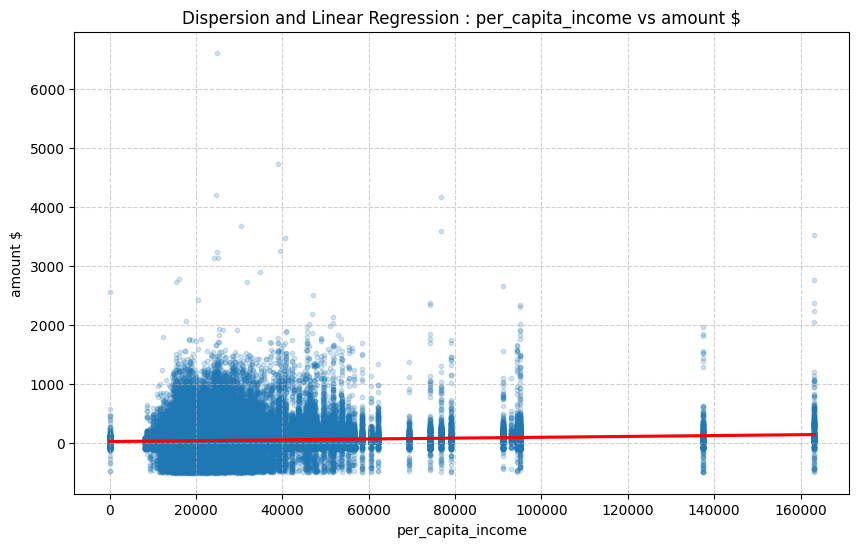

In [ ]:
# =======================================================================
# 1. DISPERSION PLOT - AMOUNT $ AND PER_CAPITA_INCOME
# =======================================================================

# --- VISUALIZATION IN SEABORN ---
X_COL = 'per_capita_income'
Y_COL = 'amount $'

plt.figure(figsize=(10, 6))
sns.regplot(
    # 2. Use the converted DataFrame
    data=df_plot_pandas,
    x=X_COL,
    y=Y_COL,
    scatter_kws={'alpha':0.2, 's':10}, # Scatter plot parameter
    line_kws={'color':'red'} # Regression line parameter
)
plt.title(f'Dispersion and Linear Regression : {X_COL} vs {Y_COL}')
plt.xlabel(X_COL)
plt.ylabel(Y_COL)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### **Comments :**
The graph shows 2 points :
1. The amount of transaction is not linearly linked with the transaction amount
2. The transaction amount cluster appear between 0 to 1000 dollars excluding the outlier points.


I will now verify the dispersion and linear regression between :

-> **current_age + yearly_income** using dispersion plot to see the tendency.

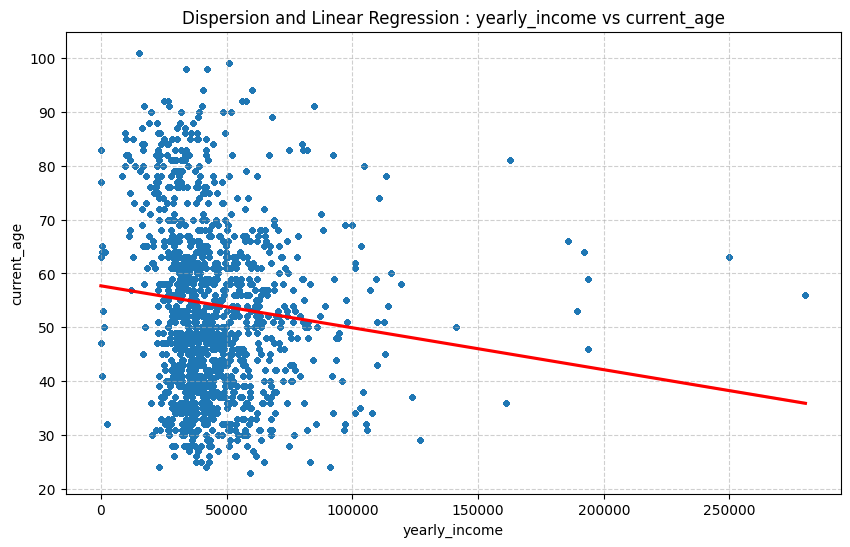

In [ ]:
# =======================================================================
# 2. DISPERSION PLOT - CURRENT_AGE AND YEARLY_INCOME
# =======================================================================

# --- VISUALIZATION IN SEABORN ---
X_COL = 'yearly_income'
Y_COL = 'current_age'

plt.figure(figsize=(10, 6))
sns.regplot(
    # 2. Use the converted DataFrame
    data=df_plot_pandas,
    x=X_COL,
    y=Y_COL,
    scatter_kws={'alpha':0.2, 's':10}, # Scatter plot parameter
    line_kws={'color':'red'} # Regression line parameter
)
plt.title(f'Dispersion and Linear Regression : {X_COL} vs {Y_COL}')
plt.xlabel(X_COL)
plt.ylabel(Y_COL)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### **Comments :**
The graph typically displays an **annual income ranging from 25,000 to 50,000 dollars**, **irrespective of age**.
**A second cluster** exists in the range of **50,000 to 75,000 dollars**.
Ultimately, a **few outliers exist above 75,000 to 80,000 dollars**.

-> **Amount $ and Current_Age** using dispersion plot to see the tendency.

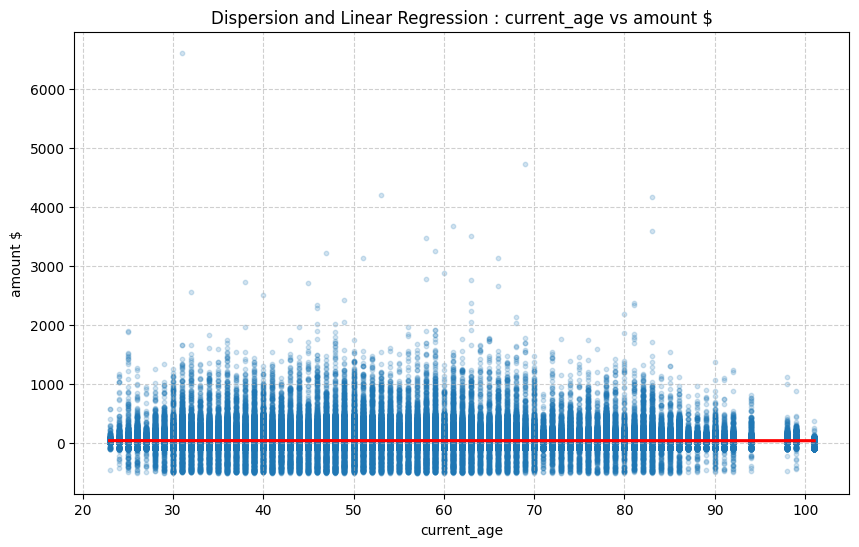

In [ ]:
# =======================================================================
# 3. DISPERSION PLOT - AMOUNT $ AND CURRENT_AGE
# =======================================================================

# --- VIZUALIZATION IN SEABORN ---
X_COL = 'current_age'
Y_COL = 'amount $'

plt.figure(figsize=(10, 6))
sns.regplot(
    # 2. Use the converted DataFrame
    data=df_plot_pandas,
    x=X_COL,
    y=Y_COL,
    scatter_kws={'alpha':0.2, 's':10}, # Scatter plot parameter
    line_kws={'color':'red'} # Regression line parameter
)
plt.title(f'Dispersion and Linear Regression : {X_COL} vs {Y_COL}')
plt.xlabel(X_COL)
plt.ylabel(Y_COL)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

### **Comments :**
This graph confirms the correlation calculated above by generally showing an **amount of transaction between -500 to 1000 dollars independently of the age.**

Then I will verify if there is a trend or correlation between payment method and the expense category.

In [ ]:
# List the different payment methodologies - I would like to see if data can be grouped or not

list_of_unique = df_plot_pandas['use_chip'].unique()
print(list_of_unique)

['Online Transaction' 'Swipe Transaction' 'Chip Transaction']


### **Comments :**
Only 3 types of transactions exist:
1. Online
2. Swipe
3. Chip

In the examination, I aim to determine whether the transactions are conducted online or 'in person'. That's why I will categorize Swipe and Chip transactions as 'In person.'

-> **Per Category and average amount** using Heatmap to get an overview of the transaction type

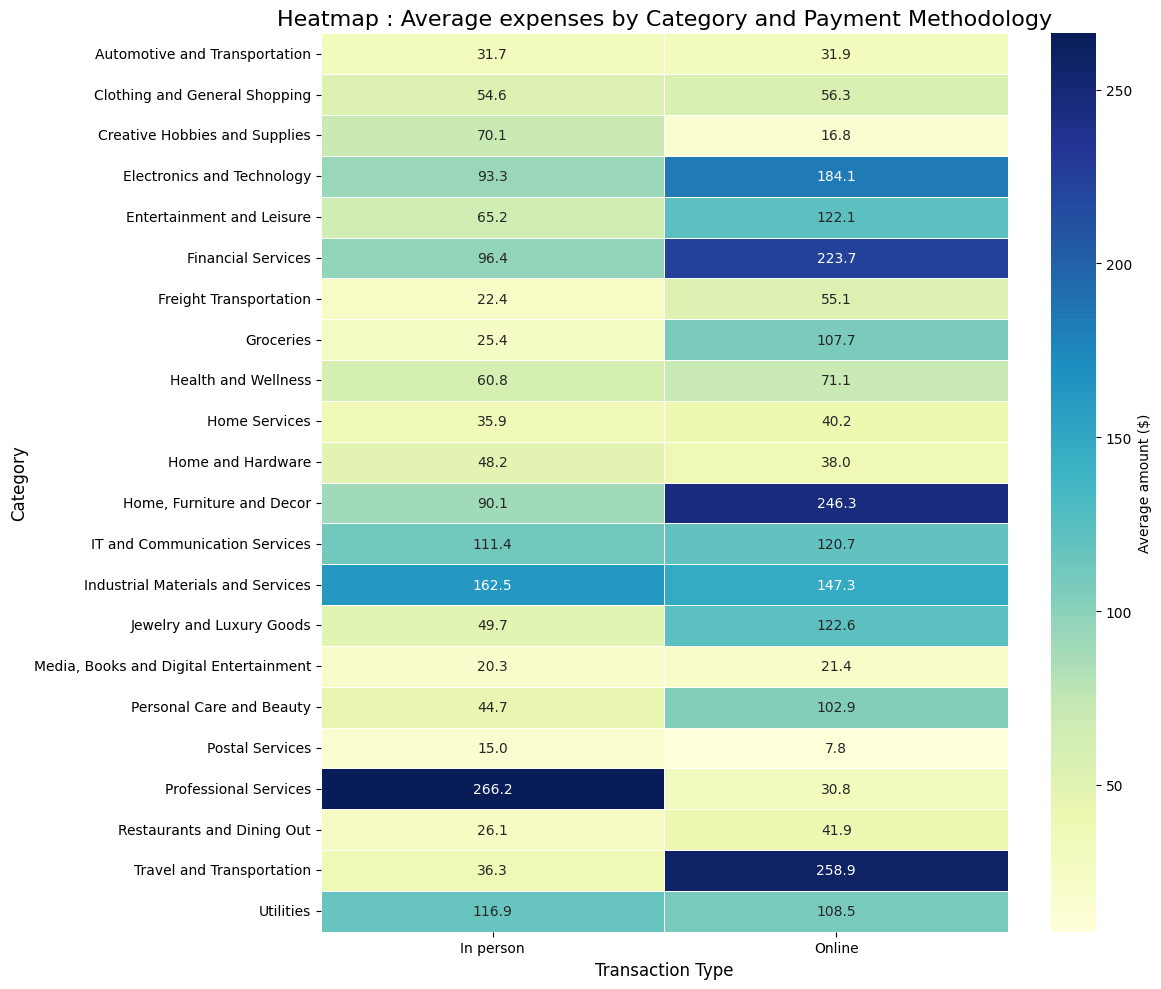

In [ ]:
# =======================================================================
# 4. HEATMAP PER CATEGROY AND AVERAGE TRANSACTION AMOUNT
# =======================================================================

# 1. Payment methodology grouped
conditions = [
    (df_plot_pandas['use_chip'] == 'Chip Transaction') | (df_plot_pandas['use_chip'] == 'Swipe Transaction'),
    (df_plot_pandas['use_chip'] == 'Online Transaction')
]

# 2. New category creation
new_category = ['In person','Online']

# 3. Apply the new category to the DataFrame
df_plot_pandas['Transaction_Type'] = np.select(conditions, new_category, default=df_plot_pandas['use_chip'])

pivot_data = (
    df_plot_pandas.groupby(['Grouped Category', 'Transaction_Type'])['amount $']
    .mean() # Usage of mean as the metric
    .unstack() # Pivot the table to see 'use_chip' as a column
)

# Replace the potential missing values with NaN
pivot_data = pivot_data.fillna(np.nan)

# 2. Design the Heatmap

plt.figure(figsize=(12, 10))

sns.heatmap(
    pivot_data,
    annot=True,              # DISPLAY NUMERICAL VALUES
    fmt=".1f",               # Format to 1 decimal
    cmap="YlGnBu",           # Heatmap color (yellow-green-blue)
    linewidths=.5,           # Add the separation line between cells for better display
    cbar_kws={'label': 'Average amount ($)'} # Label
)

# Display titles
plt.title('Heatmap : Average expenses by Category and Payment Methodology', fontsize=16)
plt.ylabel('Category', fontsize=12)
plt.xlabel('Transaction Type', fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### **Comments :**
The Heatmap is displaying some trends in payment by amount and category.

1. Professional Services are paid 'In person'.

2. For the categories below, transactions are mainly done by Internet

  -> Travel and Transportation

  -> Home, Furniture and Decor

  -> Financial Services

  -> Electronics and Technology


-> **Monthly Transaction Amount** using lineplot to see the monthly trend of transaction amount.

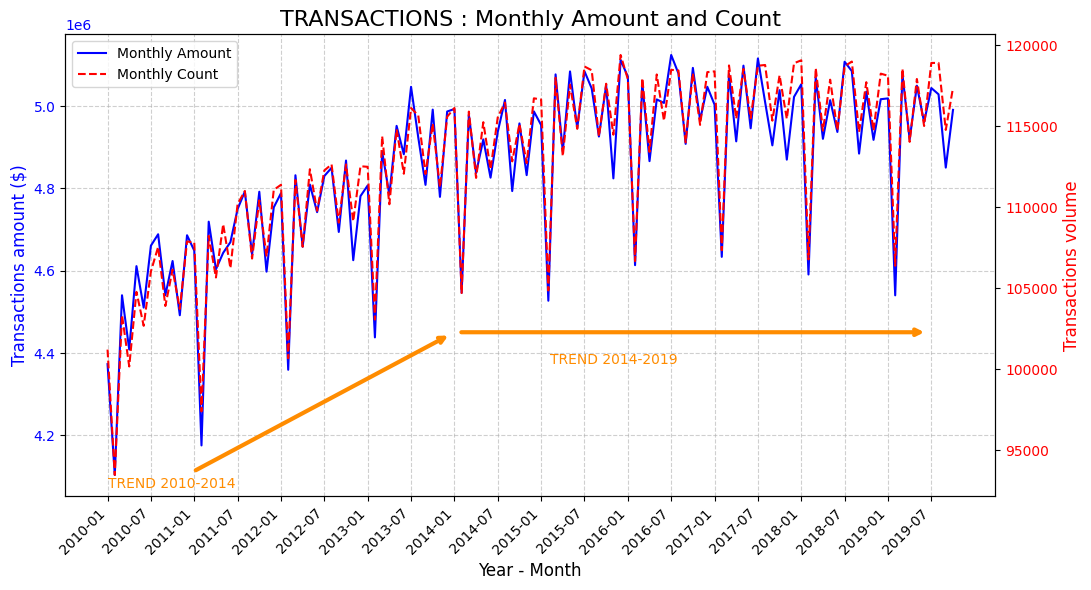

In [ ]:
# =======================================================================
# 5. LINEPLOT - MONTANT ET NOMBRE DE TRANSACTIONS MENSUELS avec ANNOTATIONS
# =======================================================================

from pyspark.sql.functions import sum, count
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Importé pour aider à la gestion des indices


# Spark Aggragation and transfer to pandas
final_agg_monthly = final.groupBy('year', 'month').agg(
    sum('amount $').alias('monthly amount'),
    count('*').alias('monthly count')
)
final_agg_monthly = final_agg_monthly.orderBy('year', 'month')

final_pandas = final_agg_monthly.toPandas()
final_pandas['year_month'] = final_pandas['year'].astype(str) + '-' + final_pandas['month'].astype(str).str.zfill(2)



# --- Graph Creation ---

fig, ax1 = plt.subplots(figsize=(12, 6))

# Axe Y1 : Transations Amount
color_amount = 'blue'
ax1.set_xlabel('Year - Month', fontsize=12)
ax1.set_ylabel('Transactions amount ($)', color=color_amount, fontsize=12)
ax1.plot(final_pandas['year_month'], final_pandas['monthly amount'], color=color_amount, label='Monthly Amount')
ax1.tick_params(axis='y', labelcolor=color_amount)

# Axe Y2 : Transation Volume (Number)
ax2 = ax1.twinx()
color_count = 'red'
ax2.set_ylabel('Transactions volume', color=color_count, fontsize=12)
ax2.plot(final_pandas['year_month'], final_pandas['monthly count'], color=color_count, linestyle='--', label='Monthly Count')
ax2.tick_params(axis='y', labelcolor=color_count)

# Update Axis X
n = 6 # Label each 6 month
ticks = final_pandas['year_month'].iloc[::n]
ax1.set_xticks(ticks=ticks, labels=ticks, rotation=45, ha='right')

# Title
plt.title('TRANSACTIONS : Monthly Amount and Count', fontsize=16)
ax1.grid(True, linestyle='--', alpha=0.6)

# Legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# =======================================================================
# --- Adding rows and annotations to the Graph ---
# =======================================================================

# --- Rows configutation ---

# 1. TREND 2010-2014
START_DATE_1 = '2010-01'
END_DATE_1 = '2014-01'
Y_START_1 = 4.1e6 	 # 4.10 millions $ (beginning of the rows)
Y_END_1 = 4.45e6 	 # 4.45 millions $ (end of the rows)

# 2. TREND 2014-2019
START_DATE_2 = '2014-01'
END_DATE_2 = '2019-07'
Y_LEVEL_2 = 4.45e6  # 4.45 millions $
TXT_Y_OFFSET_2 = 0.05e6 # Annotation below

# Function to get Index X
def get_x_index(date_str):
    try:
        return final_pandas[final_pandas['year_month'] == date_str].index[0]
    except IndexError:
        print(f"Avertissement: Date {date_str} non trouvée. Utilisation de l'index 0.")
        return 0

# --- Row 1 : 2010 - 2014 ---

idx_start_1 = get_x_index(START_DATE_1)
idx_end_1 = get_x_index(END_DATE_1)
xy_1 = (idx_end_1, Y_END_1)
xytext_1 = (idx_start_1, Y_START_1)

ax1.annotate(
    'TREND 2010-2014',
    xy=xy_1,
    xytext=xytext_1,
    arrowprops=dict(
        arrowstyle="->",             # Simple style
        connectionstyle="arc3",
        color='darkorange',          # Color
        lw=3,
        shrinkA=5,
        shrinkB=5,
    ),
    fontsize=10,
    color='darkorange',
    ha='left',
    va='top' # Put the annotation 'TREND 2010-2014'
)


# --- Row 2 : 2014 - 2019 ---

idx_start_2 = get_x_index(START_DATE_2)
idx_end_2 = get_x_index(END_DATE_2)
xy_2 = (idx_end_2, Y_LEVEL_2)
xytext_2 = (idx_start_2, Y_LEVEL_2)

txt_x_2 = idx_start_2 + (idx_end_2 - idx_start_2) / 3 # Text in the middle
txt_y_2 = Y_LEVEL_2 - TXT_Y_OFFSET_2 # Text below


# Annotation
ax1.annotate(
    '',
    xy=xy_2,
    xytext=xytext_2,
    arrowprops=dict(
        arrowstyle="->",
        connectionstyle="arc3,rad=0",
        color='darkorange',
        lw=3,
        shrinkA=5,
        shrinkB=5,
    ),
    annotation_clip=False
)

# Trend text
ax1.text(
    txt_x_2,
    txt_y_2,
    'TREND 2014-2019',
    fontsize=10,
    color='darkorange',
    ha='center',
    va='top'
)


plt.show()

### **Comments :**
I see in the trend that each year, there is a **'drop in amount' in February**.
As well, between **2010 and 2014**, there is an **increasing trend of transaction amounnt** in the US. And **from 2014 until 2019**, the trend shows a **stability of the market**

I will analyze now if there is a trend by category.

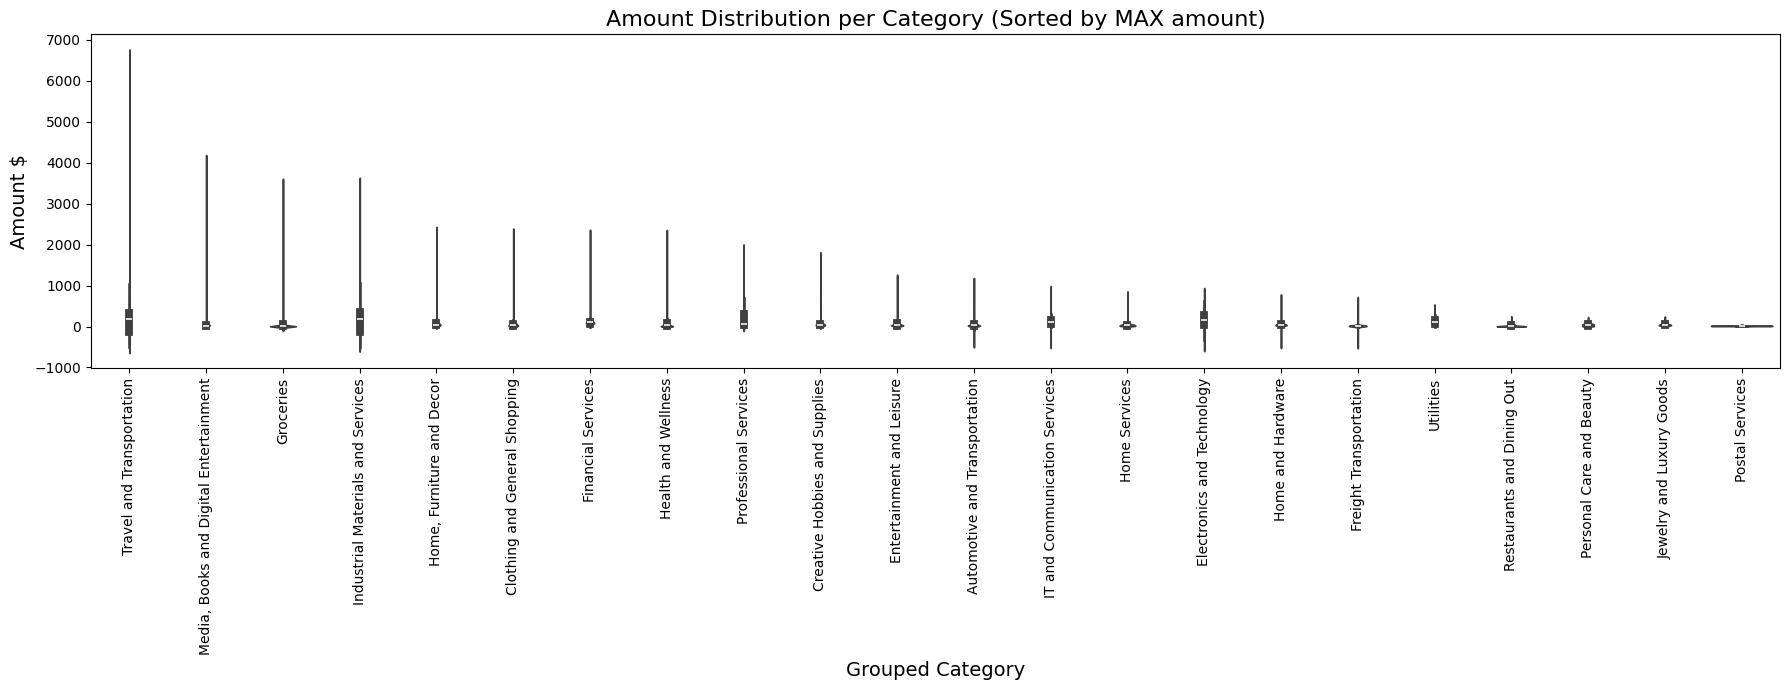

In [ ]:
# =================================================================
# KEY STEP 1: Calculate the category order using the MAX function
# =================================================================
order_categories_by_max = (
    df_plot_pandas.groupby('Grouped Category')['amount $']
    .max()
    .sort_values(ascending=False)
    .index.tolist() # Extract of the result into a list
)

# =================================================================
# KEY STEP 2: Apply the order in the graph sns.violinplot
# =================================================================
plt.figure(figsize=(18, 7))

sns.violinplot(
    data=df_plot_pandas,
    x='Grouped Category',
    y='amount $',
    order=order_categories_by_max
)

plt.title('Amount Distribution per Category (Sorted by MAX amount)', fontsize=16)
plt.xlabel('Grouped Category', fontsize=14)
plt.ylabel('Amount $', fontsize=14)
plt.xticks(rotation=90, ha='center')
plt.tight_layout()
plt.show()

### **Comments :**
The outcome of this graph indicates that **individuals can allocate more funds to specific categories**. I notice that 'Travel and Transportation' has nearly double the highest expenditure relative to the second category, 'Media, Books, and Digital Entertainment.'

I will **compare the highest amount with the median amount and volume** by constructing a table and including gender.

In [ ]:
# Cleaning the NaN - Even if the cleaning part has been done before, I make sure there are no NaN
df_plot_pandas['gender'] = df_plot_pandas['gender'].astype(str).str.strip().replace({'': np.nan, 'other': np.nan})
df_plot_pandas.dropna(subset=['gender', 'Grouped Category'], inplace=True)

# =================================================================
# 1. CALCULATION AND RANKING PER CATEGORY
# =================================================================

# Calculation of MAX per category
category_max_rank = (
    df_plot_pandas.groupby('Grouped Category')['amount $']
    .max()
    .sort_values(ascending=False)
    .reset_index()
)
# Creation of a ranking column
category_max_rank['Category Rank'] = category_max_rank.index + 1
category_max_rank = category_max_rank[['Grouped Category', 'Category Rank']] # Keep only the Category and its Rank

# =================================================================
# 2. CALCULATION PER GENDER
# =================================================================

# Grouping the metric on the 2 categories : 'Grouped Category' and 'Gender'
category_gender_metrics = (
    df_plot_pandas.groupby(['Grouped Category', 'gender'])['amount $']
    .agg([('Max Amount ($)', 'max'),
          ('Median Amount ($)', 'median'),
          ('Transaction Count', 'size')])
    .reset_index()
)

# =================================================================
# 3. JOIN & FINAL SORT
# =================================================================

# Join the metric with the ranking category
comparison_table = pd.merge(
    category_gender_metrics,
    category_max_rank,
    on='Grouped Category',
    how='left'
)

# Sorting data :
comparison_table = comparison_table.sort_values(
    by=['Category Rank', 'Max Amount ($)'],
    ascending=[True, False],
    ignore_index=True
)

# =================================================================
# DISPLAY
# =================================================================

# Selection and renaming columns
comparison_table = comparison_table[['Category Rank', 'Grouped Category', 'gender', 'Max Amount ($)', 'Median Amount ($)', 'Transaction Count']]
comparison_table.columns = ['Rank', 'Category', 'Gender', 'Max Amount ($)', 'Median Amount ($)', 'Transaction Count']

# Select to be displayed (TOP 10 categories * 2 genders)
comparison_table = comparison_table.head(20).copy()

# Final display format
comparison_table_display = comparison_table.copy()
comparison_table_display['Max Amount ($)'] = comparison_table_display['Max Amount ($)'].apply(lambda x: f"${x:,.2f}")
comparison_table_display['Median Amount ($)'] = comparison_table_display['Median Amount ($)'].apply(lambda x: f"${x:,.2f}")
comparison_table_display['Transaction Count'] = comparison_table_display['Transaction Count'].apply(lambda x: f"{int(x):,}")


print("Market Segmentation - Sorted by Category (Max) and Gender):")
print("-" * 120)
print(comparison_table_display.to_markdown(index=False))

Market Segmentation - Sorted by Category (Max) and Gender):
------------------------------------------------------------------------------------------------------------------------
|   Rank | Category                               | Gender   | Max Amount ($)   | Median Amount ($)   | Transaction Count   |
|-------:|:---------------------------------------|:---------|:-----------------|:--------------------|:--------------------|
|      1 | Travel and Transportation              | Female   | $6,613.44        | $183.00             | 2,594               |
|      1 | Travel and Transportation              | Male     | $3,477.66        | $174.48             | 2,568               |
|      2 | Media, Books and Digital Entertainment | Male     | $4,175.85        | $11.38              | 15,184              |
|      2 | Media, Books and Digital Entertainment | Female   | $1,046.44        | $13.32              | 15,717              |
|      3 | Groceries                              | Male     | 

### **Comments :**
The table shows a lot of information:
1. Travel and Transportation is NOT the category with the biggest volume of transactions but has the MAX amount. It indicates that people are spending more in this category.
2. Groceries is the category on which one there are the most of transactions.
3. Just after Groceries, the second and third categories in terms of volume are the Health and Wellness and Clothing and Shopping. They are also in the TOP 10 where people can spend the most. People care about their image and health.
4. Overall , I see some distinctions based on gender:
- The maximum amount in Travel and Transportation is spent by women.
- The maximum amount in Media, Books, and Digital Entertainment is spent by men.
- The volume of transactions in Home Furniture and Decor is higher for women.
- The volume and maximum amount in Clothing and Shopping are higher for women.


## <span style="color:blue;">4. FOURTH STEP : CONCLUSION

Furthering the analysis above, the US market in the 2010s decade indicates many points:

##  How did the US market evolve during the decade of the 2010s ?
1. The month of February is always impacted by a decreased transaction volume
2. Between 2010 - 2014, the market trend of transaction amount was increasing and from 2014 until 2019, the trend is stable
3. The standard amount spent for transactions is up to 1000 dollars / 1500 dollars

##  What are the market segments ?
1. People are able to spend more on travelling.
2. Professional Services are paid 'in person' while the categories below are mainly done online:
-> Travel and Transportation
-> Home, Furniture and Decor
-> Financial Services
-> Electronics and Technology
3. Groceries is the category with the highest volume of transactions.
4. Depending on the category and gender, some trends are visible:
So it can be useful in case of marketing campaign to focus on a gender (eg. Media and entertainment for men and clothes, shopping and home for women)

Then I will create an interactive dashboard in Power BI to share this conclusion.

As analyzed above, there are some trends and the next questions can be:
1. How will the monthly expenses evolve by category ?

Additionnaly, some categories seems linked (Health and Wellness for example).
2. What are the linked categories of expenses linked ?

## **Author : Aurelien Legendre**